# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
data = pd.read_csv('bevg-sales_clustered.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7585 entries, 0 to 7584
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       7585 non-null   object 
 1   Customer_ID    7585 non-null   object 
 2   Customer_Type  7585 non-null   object 
 3   Product        7585 non-null   object 
 4   Category       7585 non-null   object 
 5   Unit_Price     7585 non-null   float64
 6   Quantity       7585 non-null   float64
 7   Discount       7585 non-null   float64
 8   Total_Price    7585 non-null   float64
 9   Region         7585 non-null   object 
 10  Order_Date     7585 non-null   object 
 11  Cluster        7585 non-null   int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 711.2+ KB


In [4]:
data.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen,2021-02-17,0
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt,2023-04-15,2
2,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein,2021-09-07,2
3,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen,2023-04-28,0
4,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen,2023-11-01,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# Menghapus kolom yang tidak relevan
data = data.drop(columns=['Order_ID', 'Customer_ID', 'Order_Date'])

data = data.drop_duplicates(ignore_index=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6973 entries, 0 to 6972
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  6973 non-null   object 
 1   Product        6973 non-null   object 
 2   Category       6973 non-null   object 
 3   Unit_Price     6973 non-null   float64
 4   Quantity       6973 non-null   float64
 5   Discount       6973 non-null   float64
 6   Total_Price    6973 non-null   float64
 7   Region         6973 non-null   object 
 8   Cluster        6973 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 490.4+ KB


In [7]:
X = data.drop(columns=['Cluster'])
y = data['Cluster']

In [8]:
X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen
1,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt
2,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein
3,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen
4,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen


In [9]:
scaler = MinMaxScaler()

# Corrected line to select numerical columns
num_columns = X.select_dtypes(include=['int64', 'float64']).columns

X[num_columns] = scaler.fit_transform(X[num_columns])

In [10]:
X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2C,Coca-Cola,Soft Drinks,0.119730,0.089552,0.0,0.042480,Bremen
1,B2B,Selters,Water,0.064081,0.671642,1.0,0.178600,Sachsen-Anhalt
2,B2B,Monster,Soft Drinks,0.396290,0.432836,0.5,0.467894,Schleswig-Holstein
3,B2C,San Pellegrino,Water,0.097808,0.029851,0.0,0.014468,Hessen
4,B2C,Beck's,Alcoholic Beverages,0.182125,0.044776,0.0,0.032383,Bremen


In [11]:
# Melakukan encoding pada kolom kategorikal
encoder = LabelEncoder()

categorical_columns = X.select_dtypes(include=['object']).columns
for column in categorical_columns:
    X[column] = encoder.fit_transform(X[column])

In [12]:
X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,1,5,2,0.119730,0.089552,0.0,0.042480,4
1,0,32,3,0.064081,0.671642,1.0,0.178600,13
2,0,20,2,0.396290,0.432836,0.5,0.467894,14
3,1,29,3,0.097808,0.029851,0.0,0.014468,6
4,1,2,0,0.182125,0.044776,0.0,0.032383,4


In [13]:
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [14]:
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Train set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Train set shape: X_train=(5578, 8), y_train=(5578,)
Test set shape: X_test=(1395, 8), y_test=(1395,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train, y_train)
nb_model = GaussianNB().fit(X_train, y_train)

print("Training Model is Success")

Training Model is Success


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

* **Decision Tree** adalah algoritma klasifikasi dan regresi yang bekerja dengan membagi data ke dalam struktur pohon keputusan berdasarkan fitur yang paling signifikan.  
 * Prinsip kerja: Decision Tree membagi data secara rekursif, di mana setiap **node** mewakili fitur, **cabang** adalah keputusan, dan **daun** adalah hasil klasifikasi. Pemisahan dilakukan berdasarkan fitur terbaik menggunakan metrik seperti **Gini Impurity** atau **Entropy**, hingga mencapai kondisi berhenti seperti kelas yang seragam atau batas kedalaman pohon.

* **Naive Bayes** adalah algoritma klasifikasi berbasis probabilitas yang didasarkan pada Teorema Bayes, dengan asumsi bahwa setiap fitur bersifat independen satu sama lain.
 * Prinsip kerja: Menerapkan Teorema Bayes untuk menghitung probabilitas tiap kelas suatu data baru termasuk dalam masing-masing kelas. Model tersebut menghitung probabilitas posterior dari kelas, dan memilih kelas dengan probabilitas tertinggi.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       981
           1    0.98246   0.97391   0.97817       115
           2    0.96753   0.98026   0.97386       152
           3    0.99315   0.98639   0.98976       147

    accuracy                        0.99427      1395
   macro avg    0.98578   0.98514   0.98545      1395
weighted avg    0.99429   0.99427   0.99427      1395



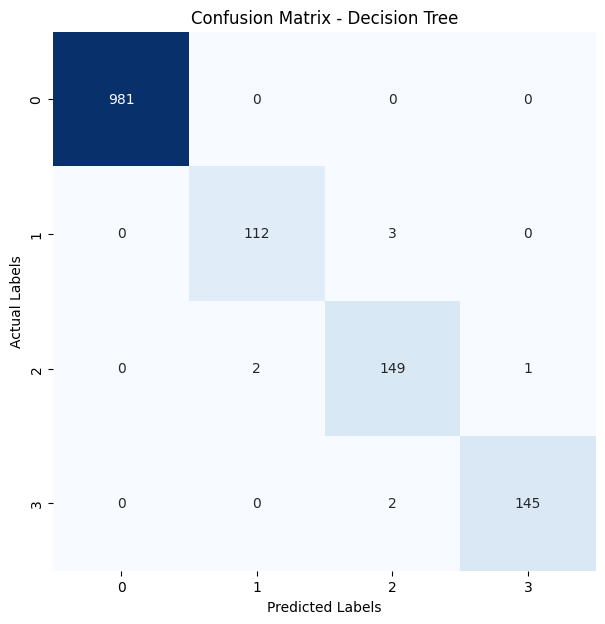

In [16]:
unique_labels = sorted(set(y))

# -----------------------------
# Decision Tree
# -----------------------------

dt_y_pred = dt.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_y_pred, digits=5))

dt_cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=unique_labels,
            yticklabels=unique_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()
print('\n')

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       981
           1    0.98230   0.96522   0.97368       115
           2    0.94702   0.94079   0.94389       152
           3    0.95333   0.97279   0.96296       147

    accuracy                        0.98781      1395
   macro avg    0.97066   0.96970   0.97014      1395
weighted avg    0.98785   0.98781   0.98781      1395



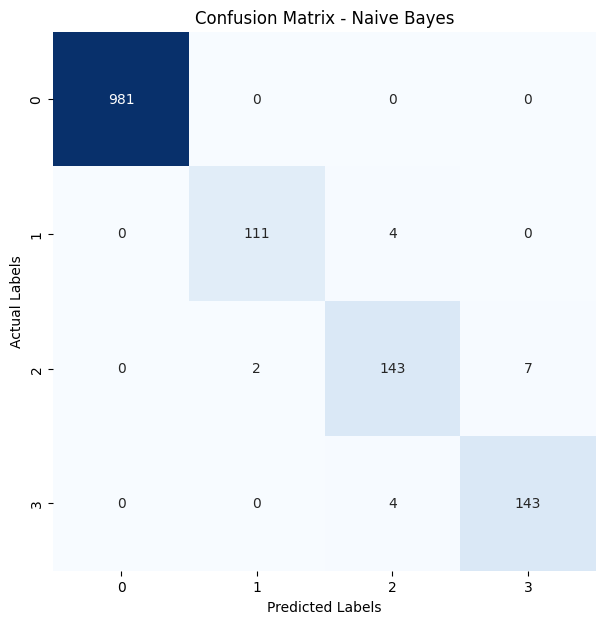

In [17]:
# -----------------------------
# Naive Bayes
# -----------------------------

nb_model_y_pred = nb_model.predict(X_test)
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_model_y_pred, digits=5))

nb_model_cm = confusion_matrix(y_test, nb_model_y_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(nb_model_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=unique_labels,
            yticklabels=unique_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [18]:
# Calculate classification reports for both models
dt_report = classification_report(y_test, dt_y_pred, digits=5, output_dict=True)
nb_model_report = classification_report(y_test, nb_model_y_pred, digits=5, output_dict=True)

# Extract relevant metrics (accuracy, precision, recall, F1 score)
metrics = {
    'Model': ['Decision Tree', 'Naive Bayes'],
    'Accuracy': [dt_report['accuracy'], nb_model_report['accuracy']],
    'Precision': [dt_report['weighted avg']['precision'], nb_model_report['weighted avg']['precision']],
    'Recall': [dt_report['weighted avg']['recall'], nb_model_report['weighted avg']['recall']],
    'F1-Score': [dt_report['weighted avg']['f1-score'], nb_model_report['weighted avg']['f1-score']]
}

# Create a DataFrame
df = pd.DataFrame(metrics)

df


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.994265,0.994294,0.994265,0.994272
1,Naive Bayes,0.987814,0.987851,0.987814,0.987814


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [23]:
# --------------------------------------------
# 1. Decision Tree Model Hyperparameter Tuning
# --------------------------------------------

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define Decision Tree hyperparameters
dt_param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Perform RandomizedSearchCV for Decision Tree
dt_random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=69),
                                        param_distributions=dt_param_dist,
                                        n_iter=100,  # Number of parameter settings that are sampled
                                        cv=3,  # Number of folds in cross-validation
                                        verbose=2,  # Controls the verbosity: the higher, the more messages
                                        random_state=69,  # Controls the randomness of the estimator
                                        n_jobs=-1)  # Number of jobs to run in parallel. -1 means using all processors

# Fit the model on the training data
dt_random_search.fit(X_train, y_train)

# ------------------------------------------
# 2. Naive Bayes Model Hyperparameter Tuning
# ------------------------------------------

# Define Naive Bayes hyperparameters
nb_model_param_dist = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Smoothing parameter
}

# Perform RandomizedSearchCV for Naive Bayes
nb_model_random_search = RandomizedSearchCV(estimator=GaussianNB(),
                                      param_distributions=nb_model_param_dist,
                                      n_iter=100,
                                      cv=3,
                                      verbose=2,
                                      random_state=69,
                                      n_jobs=-1)

# Fit the model on the training data
nb_model_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GaussianNB(), n_iter=100, n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-0...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=69, verbose=2)

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [26]:
# -----------------------------
# 1. Decision Tree
# -----------------------------

# Print the best parameters and score
print("Best Decision Tree Hyperparameters:", dt_random_search.best_params_)
print("Best Decision Tree Accuracy:", dt_random_search.best_score_)

# Predict and evaluate the Decision Tree model
dt_best_model = dt_random_search.best_estimator_
dt_best_model_y_pred = dt_best_model.predict(X_test)
print("Decision Tree (best model) Classification Report:\n", classification_report(y_test, dt_best_model_y_pred, digits=5))

# -----------------------------
# 2. Naive Bayes
# -----------------------------

# Print the best parameters and score
print("Best Naive Bayes Hyperparameters:", nb_model_random_search.best_params_)
print("Best Naive Bayes Accuracy:", nb_model_random_search.best_score_)

# Predict and evaluate the Naive Bayes model
nb_model_best = nb_model_random_search.best_estimator_
nb_model_best_y_pred = nb_model_best.predict(X_test)
print("Naive Bayes (best model) Classification Report:\n", classification_report(y_test, nb_model_best_y_pred, digits=5))


Best Decision Tree Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'criterion': 'gini'}
Best Decision Tree Accuracy: 0.9944422271965697
Decision Tree (best model) Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       981
           1    0.99107   0.96522   0.97797       115
           2    0.96774   0.98684   0.97720       152
           3    0.99320   0.99320   0.99320       147

    accuracy                        0.99498      1395
   macro avg    0.98800   0.98631   0.98709      1395
weighted avg    0.99503   0.99498   0.99498      1395

Best Naive Bayes Hyperparameters: {'var_smoothing': np.float64(1.519911082952933e-06)}
Best Naive Bayes Accuracy: 0.989601782281683
Naive Bayes (best model) Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       981
           1    0.98230   0.9652

In [27]:
# Kalkulasi klasifikasi report untuk kedua model
dt_best_report = classification_report(y_test, dt_best_model_y_pred, digits=5, output_dict=True)
nb_model_best_report = classification_report(y_test, nb_model_best_y_pred, digits=5, output_dict=True)

# Extract relevant metrics (accuracy, precision, recall, F1 score)
metrics_tuned = {
    'Model': ['Decision Tree (Tuned)', 'Naive Bayes (Tuned)'],
    'Accuracy': [dt_best_report['accuracy'], nb_model_best_report['accuracy']],
    'Precision': [dt_best_report['weighted avg']['precision'], nb_model_best_report['weighted avg']['precision']],
    'Recall': [dt_best_report['weighted avg']['recall'], nb_model_best_report['weighted avg']['recall']],
    'F1-Score': [dt_best_report['weighted avg']['f1-score'], nb_model_best_report['weighted avg']['f1-score']]
}

# Create a DataFrame
data_tuned = pd.DataFrame(metrics_tuned)

data_tuned

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree (Tuned),0.994982,0.995032,0.994982,0.994983
1,Naive Bayes (Tuned),0.987814,0.987851,0.987814,0.987814


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [28]:
data_merged = pd.concat([df, data_tuned], ignore_index=True)
data_merged.iloc[[1, 2]] = data_merged.iloc[[2, 1]].values
data_merged

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.994265,0.994294,0.994265,0.994272
1,Decision Tree (Tuned),0.994982,0.995032,0.994982,0.994983
2,Naive Bayes,0.987814,0.987851,0.987814,0.987814
3,Naive Bayes (Tuned),0.987814,0.987851,0.987814,0.987814


- Precision atau Recall rendah untuk kelas tertentu:<br>
 - Karena kedua metrik ini cukup tinggi untuk semua model, tidak ada indikasi precision atau recall yang rendah untuk kelas tertentu; namun, model Naive Bayes sedikit lebih rendah daripada Decision Tree, yang mungkin menunjukkan bahwa algoritma Decision Tree lebih baik menangani distribusi kelas atau fitur yang lebih kompleks.
- Apakah model mengalami overfitting atau underfitting?
  - Overfitting: Tidak ada bukti overfitting, terutama pada model yang telah dituning dan Decision Tree. Model-model ini menunjukkan performa yang stabil, serta menunjukkan pemodelan yang baik tanpa terlalu cocok dengan data pelatihan.
  - Underfitting: Tidak ada bukti yang menunjukkan hal itu terjadi.
